# Quantum - Quantum Phase Estimation 

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

In [9]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the swaps!
    for qubit in range(n//2): # floor division 
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cp(-pi/float(2**(j-m)), m, j)
        circ.h(j)

## Phase Estimation for the S gate

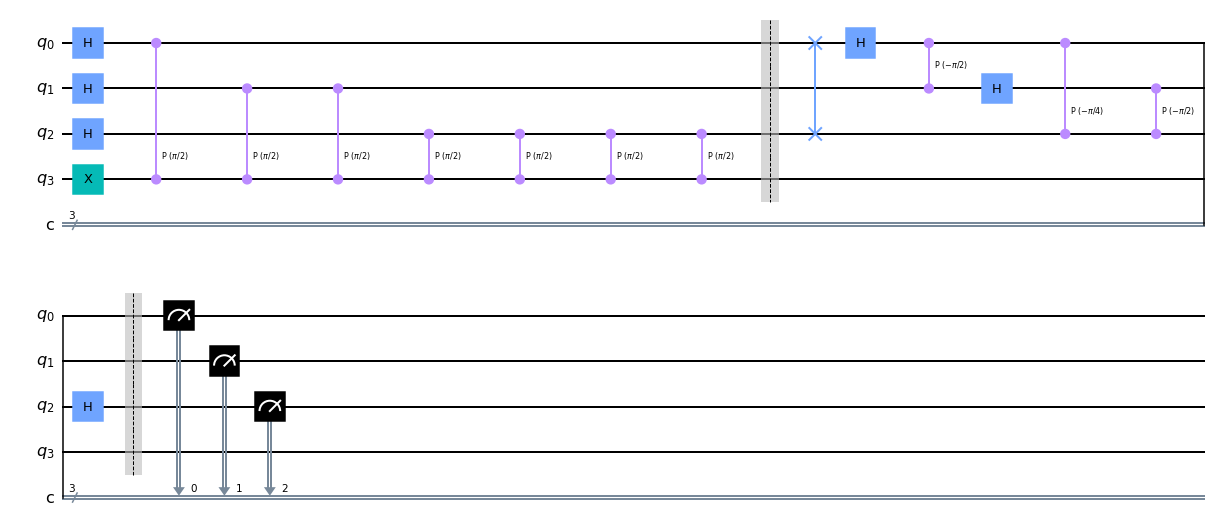

In [12]:
qpe = QuantumCircuit(4, 3)
# add the eigenvector 
qpe.x(3)
# add the hadamard gates 
for qubit in range(3):
    qpe.h(qubit)
# add the powers of the controlled T gate
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/2, counting_qubit, 3) # this is C-U, doubled the angle
    repetitions *= 2
qpe.barrier()
# apply the inverse QFT
qft_dagger(qpe, 3)
#measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw('mpl')

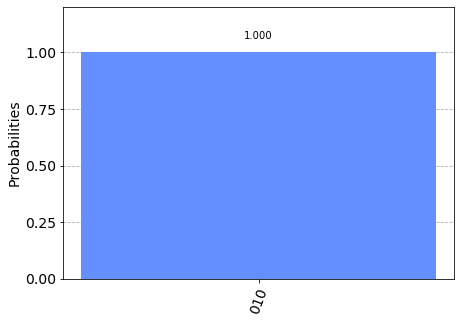

In [21]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

## Phase Estimation 

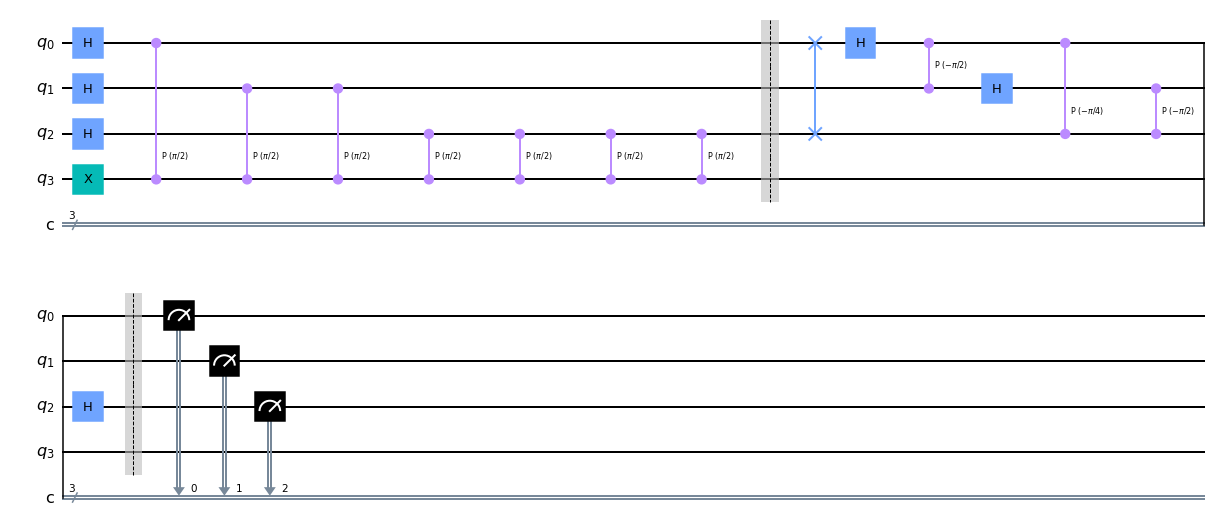

In [22]:
# create and set up circuit 
qpe2 = QuantumCircuit(4, 3)

# apply H-Gates to counting qubits
for qubit in range(3):
    qpe2.h(qubit)
    
# prepare our eigenstate |pci>:
qpe2.x(3)

# do the controlled-U operations:
angle = 2*math.pi/5
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3)
    repetitions *= 2
    
# do the inverse of QFT
qft_dagger(qpe2, 3)

# measure of course
for n in range(3):
    qpe2.measure(n,n)

qpe.draw('mpl')

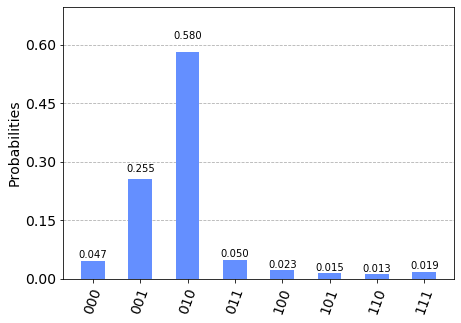

In [23]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)